In [1]:
import pandas as pd 
import numpy as np
import math

In [2]:
res = pd.read_csv("results.csv")
res.rename(columns={'Unnamed: 0':'State'}, inplace=True)
res = res.iloc[:-1]

In [3]:
vader = pd.read_csv("statewise_total_idea1.csv")
vader.rename(columns={'Unnamed: 0':'State'}, inplace=True)

In [4]:
bnb = pd.read_csv("statewise_total_idea2.csv")
bnb.rename(columns={'Unnamed: 0':'State'}, inplace=True)

In [5]:
vader_subj = pd.read_csv("statewise_total_idea3.csv")
vader_subj.rename(columns={'Unnamed: 0':'State'}, inplace=True)

In [6]:
bnb_subj = pd.read_csv("statewise_total_idea4.csv")
bnb_subj.rename(columns={'Unnamed: 0':'State'}, inplace=True)

In [7]:
vader_bnb = pd.read_csv("statewise_total_idea5.csv")
vader_bnb.rename(columns={'Unnamed: 0':'State'}, inplace=True)

In [8]:
sentiment = "vader"
if sentiment=="bnb":
    df = bnb
elif sentiment=="vader":
    df = vader
elif sentiment=="vader_subj":
    df = vader_subj
elif sentiment=="bnb_subj":
    df = bnb_subj
elif sentiment=="vader_bnb":
    df = vader_bnb
df['Actual Biden Percentage'] = res['Biden Percentage']
df['Actual Trump Percentage'] = res['Trump Percentage']
df['Actual Winner'] = res["Winner"]
df["Total Tweets"] = df["Trump Total count"] + df["Biden Total count"]

In [9]:
df.head()

,State,Trump Positive count,Trump Negative count,Trump Neutral count,Trump Total count,Biden Positive count,Biden Negative count,Biden Neutral count,Biden Total count,Trump Positive Sum,Trump Negative Sum,Trump Total Sum,Biden Positive Sum,Biden Negative Sum,Biden Total Sum,Actual Biden Percentage,Actual Trump Percentage,Actual Winner,Total Tweets
0,Alabama,353,160,336,849,329,155,380,864,112,44,156,113,36,150,0.37,0.62,Trump,1713
1,Alaska,145,52,114,311,158,104,167,429,34,13,48,50,22,73,0.43,0.53,Trump,740
2,Arizona,1133,630,1102,2865,1258,566,1424,3248,334,178,513,416,151,567,0.49,0.49,Biden,6113
3,Arkansas,205,133,275,613,210,73,186,469,58,32,90,70,18,88,0.35,0.62,Trump,1082
4,California,10906,7118,13128,31152,10266,4223,11329,25818,3279,1959,5238,3528,1084,4612,0.63,0.34,Biden,56970


In [10]:
df.describe()

,Trump Positive count,Trump Negative count,Trump Neutral count,Trump Total count,Biden Positive count,Biden Negative count,Biden Neutral count,Biden Total count,Trump Positive Sum,Trump Negative Sum,Trump Total Sum,Biden Positive Sum,Biden Negative Sum,Biden Total Sum,Actual Biden Percentage,Actual Trump Percentage,Total Tweets
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,1283.420000,800.82000,1453.820000,3538.060000,1161.360000,506.140000,1368.040000,3035.540000,387.560000,215.580000,603.620000,390.760000,130.240000,521.420000,0.477400,0.50080,6573.600000
std,2145.979697,1349.77272,2574.120358,6061.082726,2021.850837,835.438661,2272.798885,5122.220741,650.508974,367.467288,1016.570142,680.550034,217.966536,896.925886,0.103506,0.10325,11172.466293
min,24.000000,13.00000,38.000000,75.000000,43.000000,21.000000,22.000000,86.000000,7.000000,4.000000,11.000000,11.000000,5.000000,16.000000,0.270000,0.31000,161.000000
25%,201.250000,107.50000,216.250000,528.500000,159.500000,73.250000,176.250000,410.250000,58.750000,28.250000,87.750000,51.000000,18.250000,70.750000,0.402500,0.41250,964.000000
50%,440.000000,306.50000,566.000000,1310.500000,415.500000,215.000000,554.000000,1186.000000,136.500000,79.000000,217.500000,139.000000,54.000000,199.000000,0.490000,0.49500,2479.000000
75%,1261.000000,774.00000,1219.750000,3107.750000,1198.250000,525.000000,1339.250000,3069.250000,358.750000,199.750000,579.000000,394.250000,134.250000,545.250000,0.557500,0.58000,6123.500000
max,10906.000000,7118.00000,13128.000000,31152.000000,10266.000000,4223.000000,11329.000000,25818.000000,3279.000000,1959.000000,5238.000000,3528.000000,1084.000000,4612.000000,0.660000,0.70000,56970.000000


In [11]:
def getPreds(method):
    if method == 1:
        df['Biden prediction'] = df['Biden Positive count']/(df['Trump Positive count'] + df['Biden Positive count'])
        df['Trump prediction'] = df['Trump Positive count']/(df['Trump Positive count'] + df['Biden Positive count'])
    elif method == 2:
        df['Biden prediction'] = df['Trump Negative count']/(df['Trump Negative count'] + df['Biden Negative count'])
        df['Trump prediction'] = df['Biden Negative count']/(df['Trump Negative count'] + df['Biden Negative count'])
    elif method == 3:
        trump_pos = df['Trump Positive count']/(df['Trump Total count'])
        biden_pos = df['Biden Positive count']/(df['Biden Total count'])
        df['Biden prediction'] = biden_pos/(trump_pos + biden_pos)
        df['Trump prediction'] = trump_pos/(trump_pos + biden_pos)
    elif method == 4:
        trump_neg = df['Biden Negative count']/(df['Biden Total count'])
        biden_neg = df['Trump Negative count']/(df['Trump Total count'])
        df['Biden prediction'] = biden_neg/(trump_neg + biden_neg)
        df['Trump prediction'] = trump_neg/(trump_neg + biden_neg)

In [12]:
def kl_divergence(p,q):
    return sum(p[i] * math.log2(p[i]/q[i]) for i in range(len(p)))

In [13]:
def mae(p,q):
    return np.mean(np.abs(p[i] - q[i]) for i in range(len(p)))

In [14]:
from sklearn.metrics import r2_score

In [15]:
getPreds(3)

In [16]:
actual_biden = df['Actual Biden Percentage']
predicted_biden = df['Biden prediction']
actual_biden = actual_biden/actual_biden.sum()
predicted_biden = predicted_biden/predicted_biden.sum()

actual_trump = df['Actual Trump Percentage']
predicted_trump = df['Trump prediction']
actual_trump = actual_trump/actual_trump.sum()
predicted_trump = predicted_trump/predicted_trump.sum()

In [17]:
def getMetrics():
    kl_div_biden = kl_divergence(actual_biden, predicted_biden)
    kl_div_trump = kl_divergence(actual_trump, predicted_trump)
    mae_biden = np.mean(np.abs(df['Actual Biden Percentage'] - df['Biden prediction']))
    mae_trump = np.mean(np.abs(df['Actual Trump Percentage'] - df['Trump prediction']))
    print("MAE Biden: ", mae_biden)
    print("MAE Trump: ", mae_trump)
    print("KL divergence for Biden: ", kl_div_biden)
    print("KL divergence for Trump: ", kl_div_trump)
    print("R2 score: ", r2_score(df['Actual Biden Percentage'], df['Biden prediction']))

In [18]:
getMetrics()

MAE Biden:  0.08316090137390701
MAE Trump:  0.08154000665172986
KL divergence for Biden:  0.03208874055390086
KL divergence for Trump:  0.030404295951667742
R2 score:  -0.03264977313786099


In [19]:
'''
MAE Biden:  0.08316090137390701
MAE Trump:  0.08154000665172986
KL divergence for Biden:  0.03208874055390086
KL divergence for Trump:  0.030404295951667742
'''

'\nMAE Biden:  0.08316090137390701\nMAE Trump:  0.08154000665172986\nKL divergence for Biden:  0.03208874055390086\nKL divergence for Trump:  0.030404295951667742\n'

In [86]:
import matplotlib.pyplot as plt

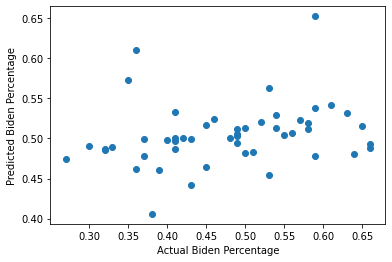

In [88]:
plt.scatter(df['Actual Biden Percentage'], df['Biden prediction'])
plt.xlabel('Actual Biden Percentage')
plt.ylabel('Predicted Biden Percentage')
plt.show()

In [94]:
x = np.arange(0,len(df['Actual Biden Percentage']))

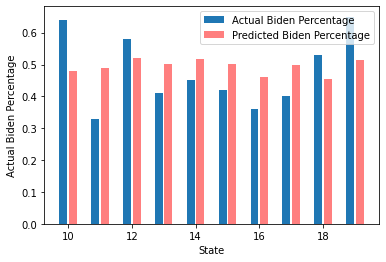

In [103]:
plt.bar(x[10:20]-0.15, df['Actual Biden Percentage'][10:20],width=0.25, label = 'Actual Biden Percentage')
plt.bar(x[10:20]+0.15, df['Biden prediction'][10:20], color='r', alpha=0.5,width=0.25, label= 'Predicted Biden Percentage')
plt.xlabel('State')
plt.ylabel('Actual Biden Percentage')
plt.legend()
plt.show()

In [83]:
col = df['Biden prediction'] > df['Trump prediction']
count = 0
for e in col:
    if e == True:
        count += 1
count

26

In [84]:
len(res[res['Winner']=="Biden"])

25

In [85]:
len(res[res['Winner']=="Trump"])

25